Customer churn is when customers cease their relationship with a company or business, typically by discontinuing their use of its products or services. It is a significant concern for businesses across various industries, including telecommunications, software, e-commerce, and subscription-based services.

# Objective
The Telco Churn project focuses on understanding and reducing customer churn within a telecommunications company.
In this project, the objective is to develop a predictive model that can identify customers likely to switch to a different service provider.
This model will help the telco company take proactive measures to retain valuable customers.

# DATA ATTRIBUTE
1. customerID : Customer ID
2. gender : Whether the customer is a male or a female
3. SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
4. Partner : Whether the customer has a partner or not (Yes, No)
5. Dependents : Whether the customer has dependents or not (Yes, No)
6. tenure : Number of months the customer has stayed with the company
7. PhoneService : Whether the customer has a phone service or not (Yes, No)
8. MultipleLines : Whether the customer has multiple lines or not (Yes, No, No
phone service)
9. InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
12. DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract : The contract term of the customer (Month-to-month, One year, Two year)
17. PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
18. PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges : The amount charged to the customer monthly
20. TotalCharges : The total amount charged to the customer
21. Churn : Whether the customer churned or not (Yes or No)

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter('ignore')

## Reading data...

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Project/Cap1')

In [ ]:
df =pd.read_csv('Telco-Customer-Churn.csv',index_col=0,header=0)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA (Exploratory data analysis)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null 

In [ ]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
num_cols = df.select_dtypes(exclude = 'object')
cat_cols = df.select_dtypes(include = 'object')

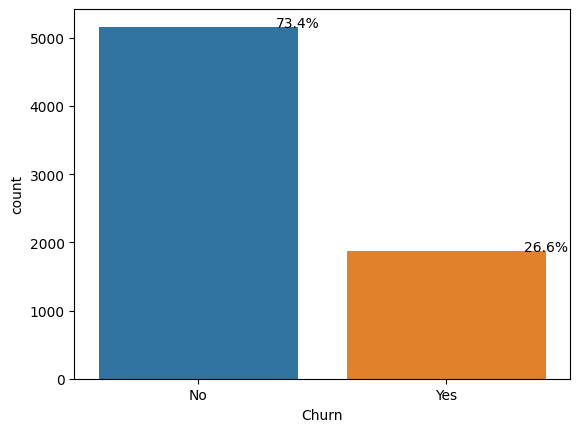

In [ ]:
ax =sns.countplot(data=df,x='Churn')
for p in ax.patches:
    total = len(df['Churn'])
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

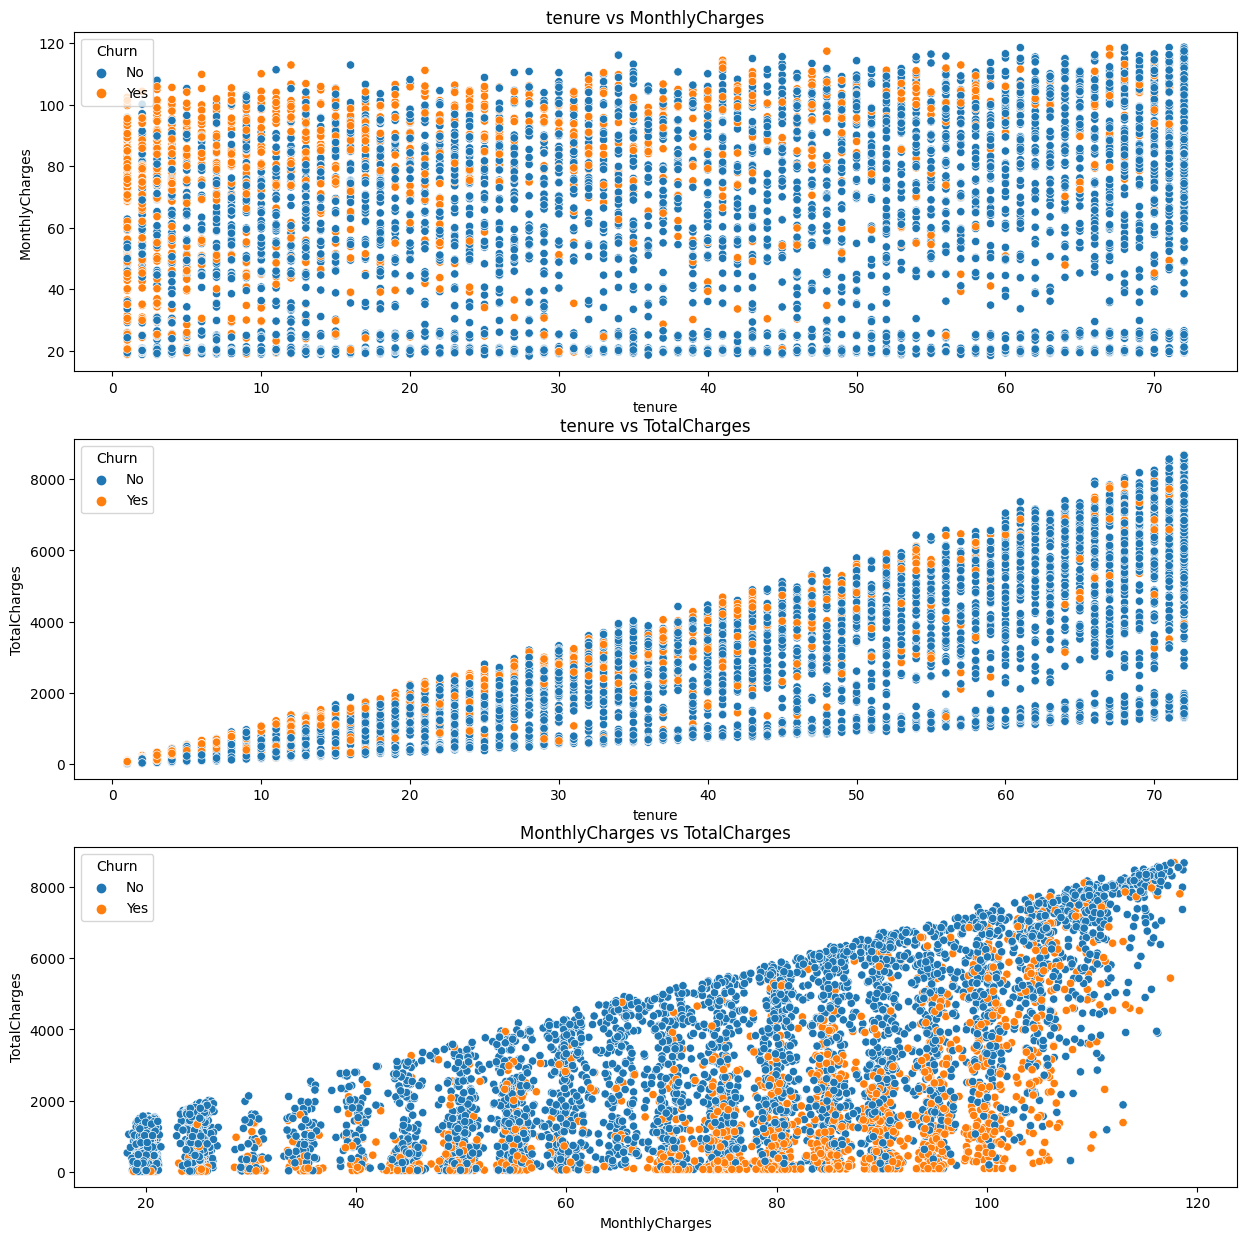

In [ ]:
col = ['tenure', 'MonthlyCharges', 'TotalCharges']
a = 0
fig,ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(col)):
    for j in range(len(col)):
        if i != j and j > i:
            a += 1
            plt.subplot(3,1,a)
            sns.scatterplot(x = col[i],y = col[j],data = df,hue = 'Churn')
            title = col[i] + ' vs ' + col[j]
            plt.title(title)

1. For tenure of 0 - 20 months period, churning of customers quite at any MonthlyCharges values. For a tenure period from 20 - 60 months, customers at the top end of the MonthlyCharges values, 70 - 120, start to drop out from the services.
2. For TotalCharges vs tenure, as tenure increases, TotalCharges increase as well! Customers opting out from their plans are the ones who are charged the highest of their tenure period alongwith a few customers whose Total Charges rank in the middle!
3. Customers seemed to have decided to cancel their subscriptions when the MonthlyCharges reach 70 and above.

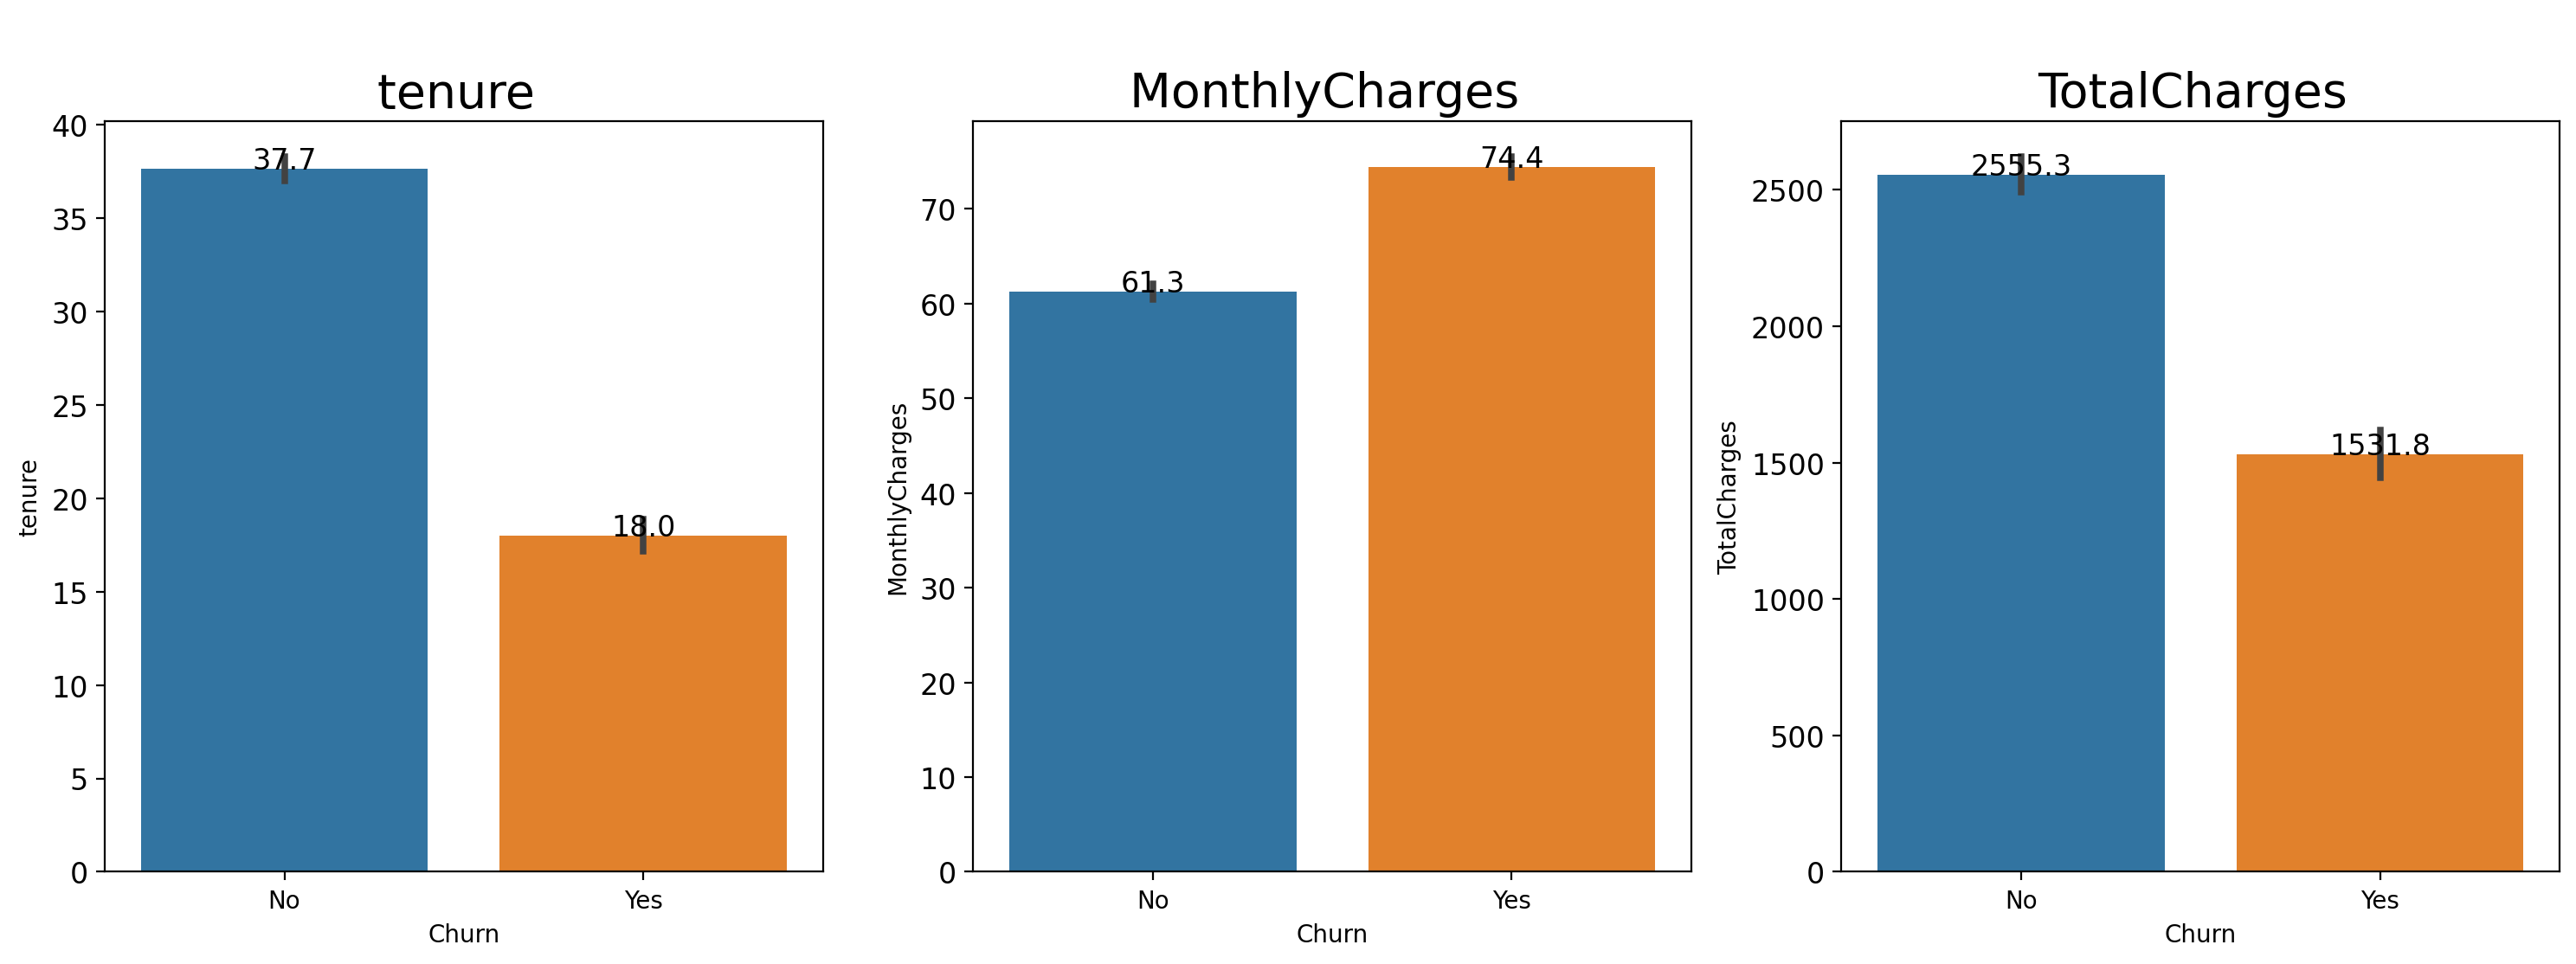

In [ ]:
# Specify the categorical columns you want to plot
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(20, 20), dpi=200)
plotnumber = 1

for col in cols:
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        plt.yticks(fontsize=12)

        # Create a vertical bar plot with 'hue' as 'Churn' and calculate the mean
        sns.barplot(x='Churn', y=col, data=df, ax=ax, estimator=np.mean)

        plt.title(f"\n{col} ", fontsize=20)

        # Add percentage annotations
        for p in ax.patches:
            mean_value = p.get_height()
            percentage = '{:.1f}'.format( mean_value)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', fontsize=12)

    plotnumber += 1

plt.tight_layout()
plt.show()

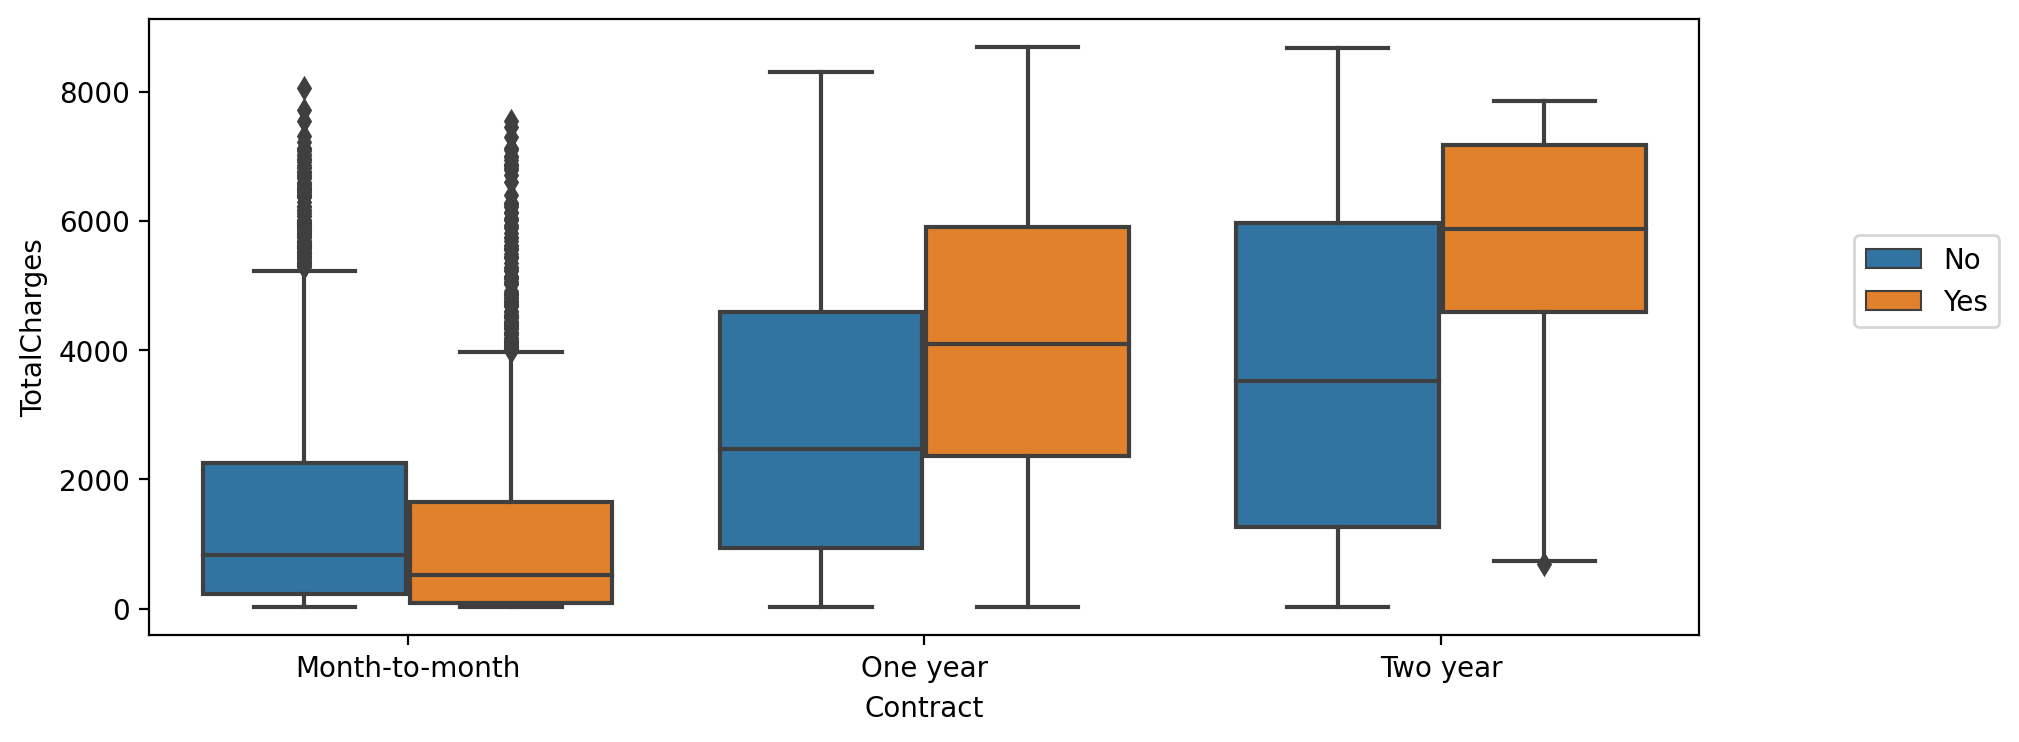

In [ ]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5))

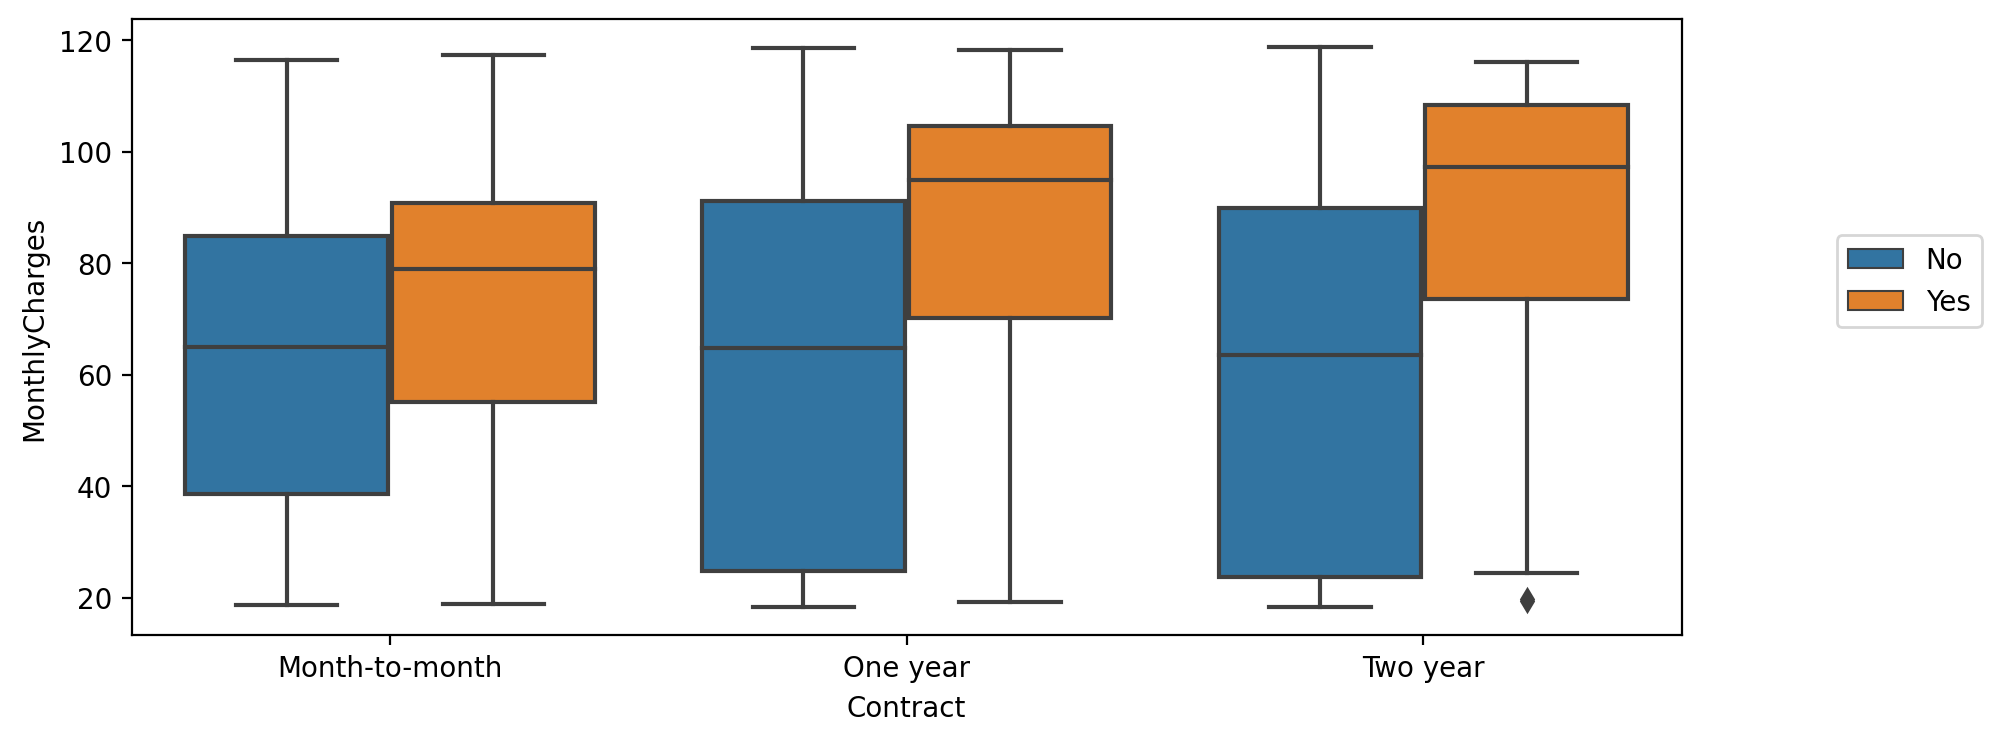

In [ ]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='MonthlyCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5))

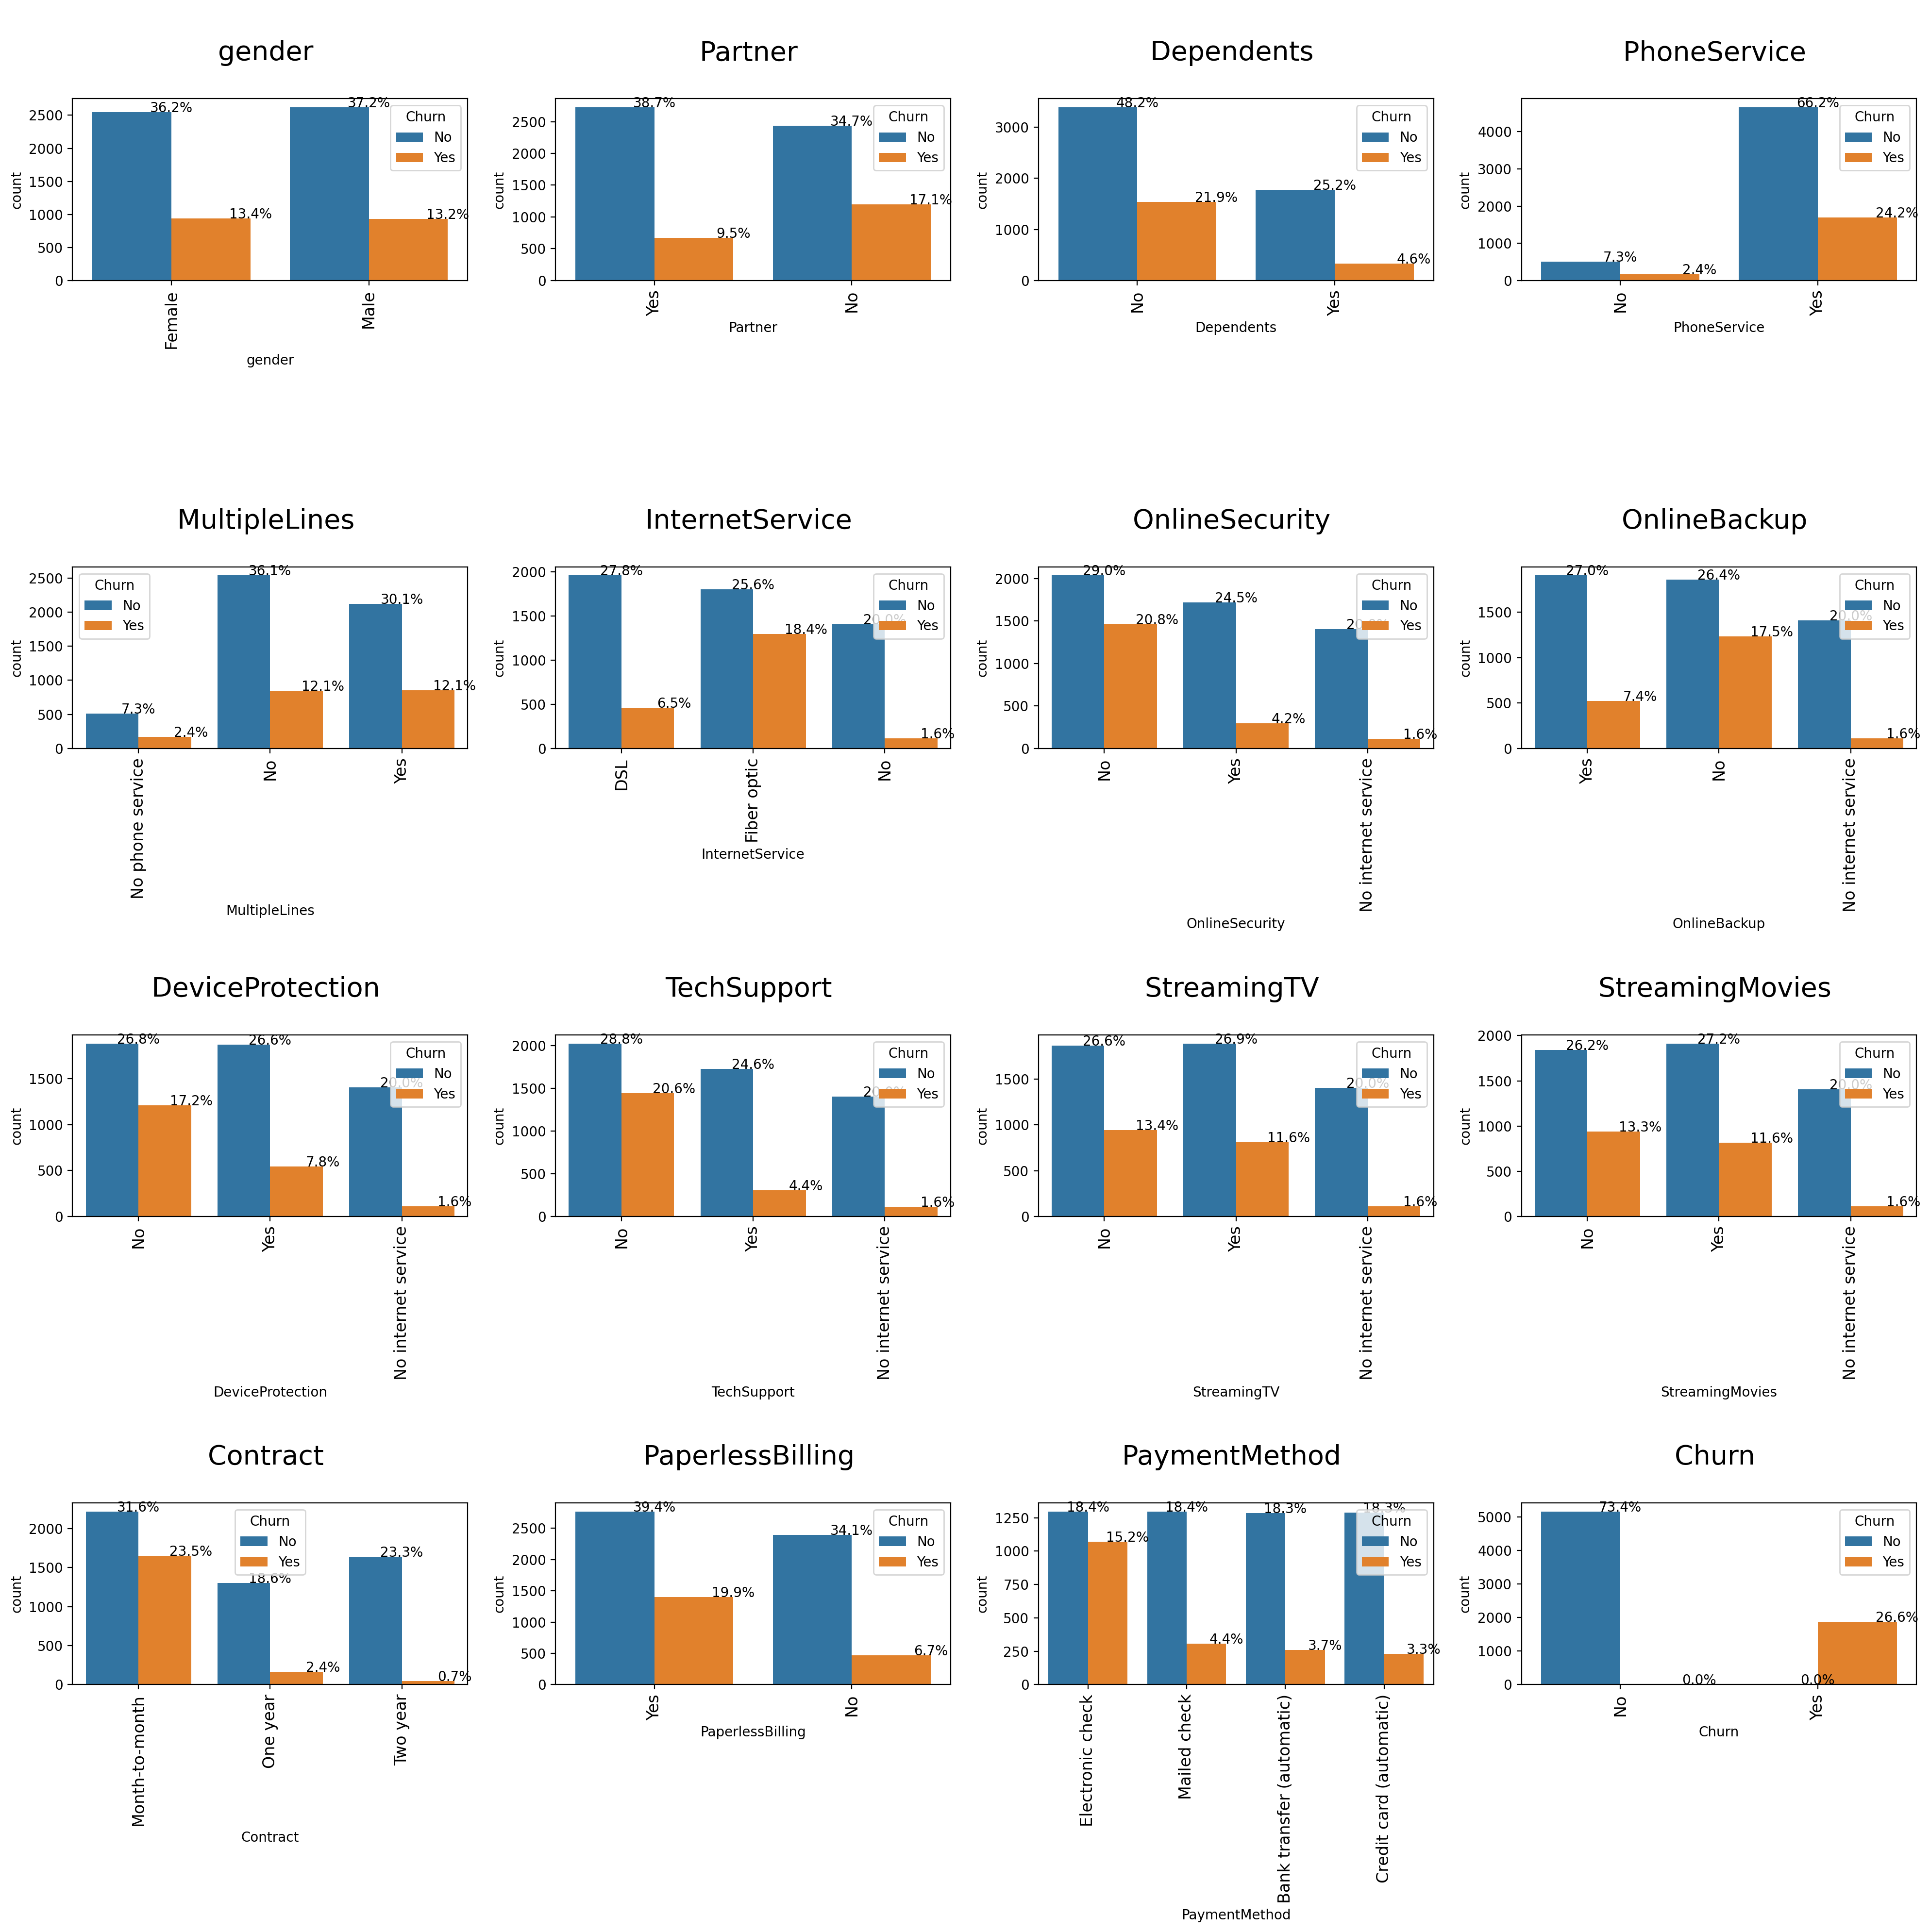

In [ ]:
cols = cat_cols.columns

plt.figure(figsize = (20, 20),dpi=200)
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 16:
        total = len(df[cols[i]])
        ax = plt.subplot(4, 4, plotnumber)
        plt.xticks(fontsize = 12, rotation = 90)
        sns.countplot(x = cols[i], data = df ,hue='Churn', ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width()
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center')

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
fig = px.sunburst(df, path=['Contract','Churn'])
fig.update_traces(textinfo="label+percent parent")
fig.show()

In [ ]:
fig = px.sunburst(df, path=['PaymentMethod','Churn'])
fig.update_traces(textinfo="label+percent parent")
fig.show()

In [ ]:
fig = px.sunburst(df, path=['Dependents','Churn'])
fig.update_traces(textinfo="label+percent parent")
fig.show()

In [ ]:
fig = px.sunburst(df, path=['SeniorCitizen','Churn'])
fig.update_traces(textinfo="label+percent parent")
fig.show()

In [ ]:
fig = px.sunburst(df, path=['TechSupport','Churn'])
fig.update_traces(textinfo="label+percent parent")
fig.show()

In [ ]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :', categorical_features)
print('Numerical Features :', numerical_features)

Categorical Features : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical Features : ['tenure', 'MonthlyCharges', 'TotalCharges']


In [ ]:
cat_cols = df.select_dtypes(include = 'object').columns
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

# Data preprocessing

## Label Encoding

In [ ]:
le = LabelEncoder()

text_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df[i] = le.fit_transform(df[i])
    print(i,' : ',df[i].unique(),' = ',le.inverse_transform(df[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


## Feature Selection

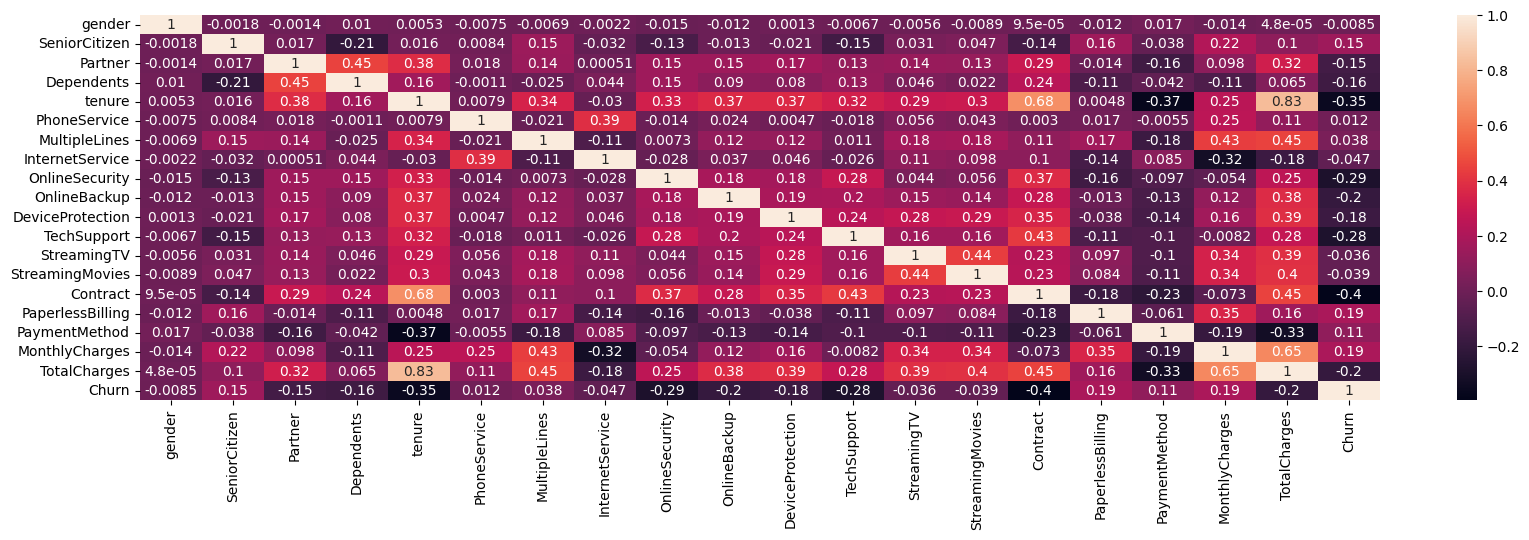

In [ ]:
plt.figure(figsize = (20,5))
sns.heatmap(df.corr(),annot = True);

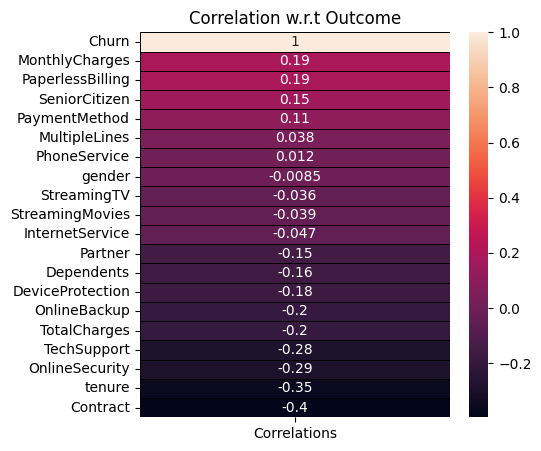

In [ ]:
corr = df.corrwith(df['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

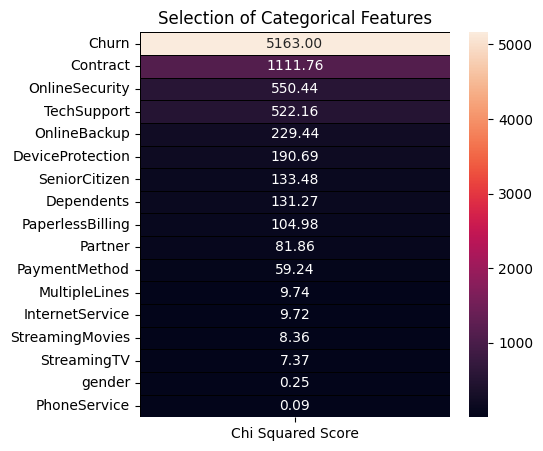

In [ ]:
features = df.loc[:,categorical_features]
target = df.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

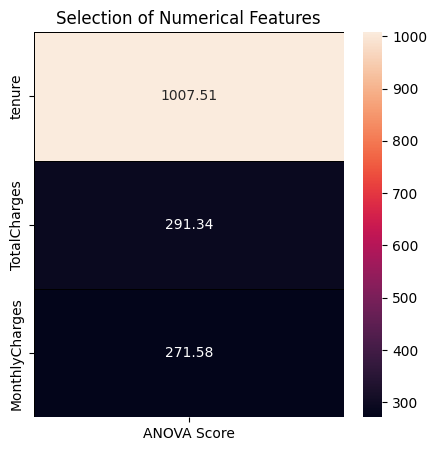

In [ ]:
features = df.loc[:,numerical_features]
target = df.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

In [ ]:
# X = df.drop(['Churn','PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],axis=1)
X = df.drop(['Churn'],axis=1)

In [ ]:
y = df['Churn']

In [ ]:
# #CODE HERE
# from sklearn.preprocessing import LabelEncoder
# cat_cols = X.select_dtypes(include = 'object')
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# cols = cat_cols.columns
# for i in range(len(cols)):
#     X[cols[i]]=le.fit_transform(X[cols[i]])
#     print(i,' : ',X[i].unique(),' = ',le.inverse_transform(X[i].unique()))


In [ ]:
X['SeniorCitizen'].unique()

array([0, 1])

In [ ]:
#  y = le.fit_transform(y)
# y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0 )

In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
9357-UJRUN,1,0,1,0,24,1,2,0,2,0,0,2,0,0,1,1,2,58.35,1346.90
9258-CNWAC,0,0,1,1,71,1,2,1,2,2,2,2,2,2,2,0,1,113.65,8166.80
3810-PJUHR,1,0,1,1,70,1,2,2,1,1,1,1,1,1,2,0,3,25.35,1715.15
2821-WARNZ,0,0,0,1,49,1,0,2,1,1,1,1,1,1,1,0,1,19.45,921.30
9167-APMXZ,0,0,0,0,22,1,2,1,0,0,0,0,2,0,0,1,0,84.15,1821.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975-SKRNR,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,18.90,18.90
2662-NNTDK,1,0,0,0,65,1,2,2,1,1,1,1,1,1,1,0,1,24.80,1600.95
1228-FZFRV,1,0,1,1,50,1,2,1,2,0,2,0,2,2,0,0,1,105.95,5341.80


In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[932 106]
 [186 183]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1038
           1       0.63      0.50      0.56       369

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
feature_scores = pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

TotalCharges        0.189817
MonthlyCharges      0.177328
tenure              0.157982
Contract            0.079176
PaymentMethod       0.053690
OnlineSecurity      0.044129
TechSupport         0.041096
gender              0.027318
OnlineBackup        0.026366
PaperlessBilling    0.026308
InternetService     0.025321
MultipleLines       0.023565
DeviceProtection    0.023417
Partner             0.022285
SeniorCitizen       0.021875
Dependents          0.019512
StreamingMovies     0.018685
StreamingTV         0.017144
PhoneService        0.004984
dtype: float64

## Creating X and y

In [ ]:
X = df.drop(['Churn','PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],axis=1)

## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0 )

## Oversampling data using SMOTE

In [ ]:
sm = SMOTE(sampling_strategy='auto', random_state=42)
X_train,y_train=sm.fit_resample(X_train,y_train)

## Data Standardization

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def model_evaluation(classifier,x_test,y_test):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

# ML Models Evaluations

## KNN (K-Nearest Neighbors)

              precision    recall  f1-score   support

           0       0.85      0.78      0.82      1038
           1       0.50      0.62      0.55       369

    accuracy                           0.74      1407
   macro avg       0.68      0.70      0.68      1407
weighted avg       0.76      0.74      0.75      1407



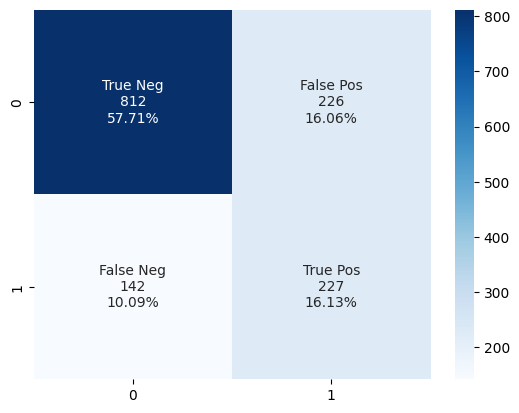

In [ ]:
KNNmodel = KNeighborsClassifier(n_neighbors=10,  weights='uniform', algorithm='brute', leaf_size=40, p=2, metric='l2', metric_params=None, n_jobs=-1)
KNNmodel.fit(X_train, y_train)
y_pred = KNNmodel.predict(X_test)
model_evaluation(KNNmodel,X_test,y_test)

## Random Forest

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1038
           1       0.57      0.67      0.62       369

    accuracy                           0.78      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.79      0.78      0.79      1407



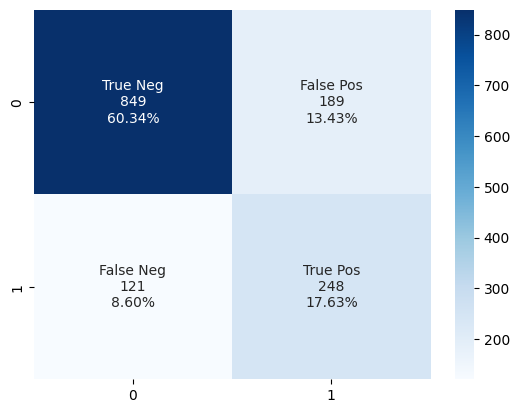

In [ ]:
rf=RandomForestClassifier(criterion='entropy', max_depth=780, max_features='auto',
                       min_samples_leaf=3, min_samples_split=16,
                       n_estimators=500)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
model_evaluation(rf,X_test,y_test)

## DecisionTree

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1038
           1       0.47      0.58      0.52       369

    accuracy                           0.72      1407
   macro avg       0.65      0.67      0.66      1407
weighted avg       0.74      0.72      0.73      1407



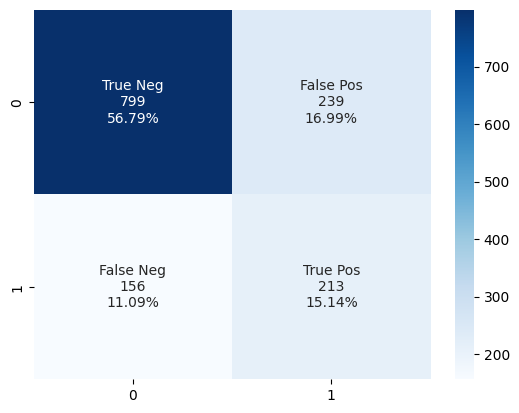

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
model_evaluation(dtree,X_test,y_test)

## DecisionTree Hyperparameter Tunning

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best cross-validation accuracy: 0.8027878787878787
Test set accuracy: 0.7327647476901208
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1038
           1       0.49      0.66      0.56       369

    accuracy                           0.73      1407
   macro avg       0.68      0.71      0.69      1407
weighted avg       0.77      0.73      0.74      1407



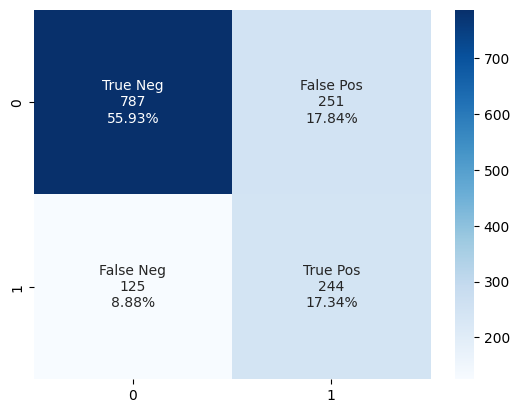

In [ ]:
# Define the hyperparameter grid to search

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate the model on the test set
best_dt = grid_search.best_estimator_
test_accuracy = best_dt.score(X_test, y_test)
print("Test set accuracy:", test_accuracy)

model_evaluation(best_dt,X_test,y_test)

## XGBoost

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1038
           1       0.49      0.81      0.61       369

    accuracy                           0.73      1407
   macro avg       0.70      0.76      0.70      1407
weighted avg       0.80      0.73      0.74      1407



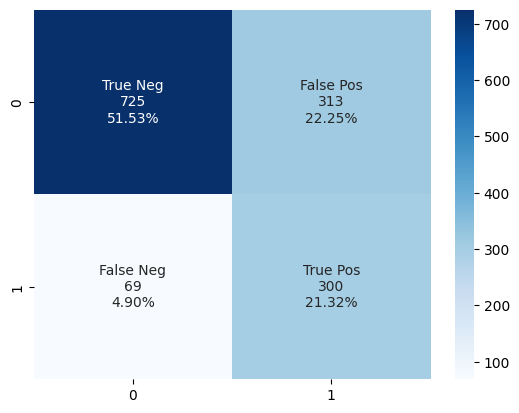

In [ ]:
XGBmodel = XGBClassifier(max_depth=200, subsample = 0.1,
                      n_estimators=2000,learning_rate=0.0001,min_child_weight=1,random_state=10,scale_pos_weight=2)
XGBmodel.fit(X_train, y_train)
y_pred = XGBmodel.predict(X_test)
model_evaluation(XGBmodel,X_test,y_test)

In [ ]:
# XGBmodel = XGBClassifier()

In [ ]:
# # Define the hyperparameter grid to search
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'max_depth': [None, 50, 100, 150,200],
#     'subsample': [0.1, 0.2, 0.3],
#     'n_estimators': [1000,1500 ,2000],
#     'scale_pos_weight': [3,4,5],
#     'learning_rate': [0.0001, 0.001,0.0002]
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(XGBmodel, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters and corresponding accuracy
# print("Best hyperparameters:", grid_search.best_params_)
# print("Best cross-validation accuracy:", grid_search.best_score_)

# # Evaluate the model on the test set
# best_dt = grid_search.best_estimator_
# test_accuracy = best_dt.score(X_test, y_test)
# print("Test set accuracy:", test_accuracy)

## LogisticRegression

              precision    recall  f1-score   support

           0       0.90      0.74      0.82      1038
           1       0.52      0.78      0.62       369

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.77      1407



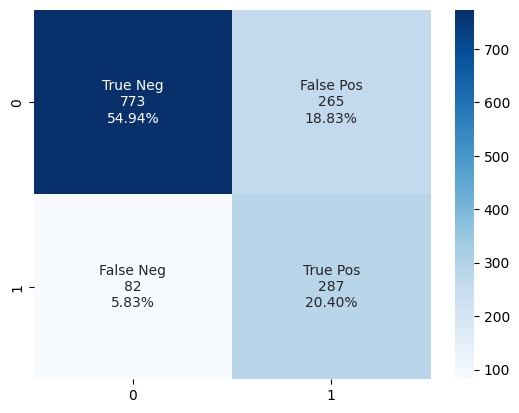

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)
model_evaluation(lr_model,X_test,y_test)

## SVM (Support Vector Machine)

              precision    recall  f1-score   support

           0       0.90      0.74      0.82      1038
           1       0.52      0.78      0.62       369

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.77      1407



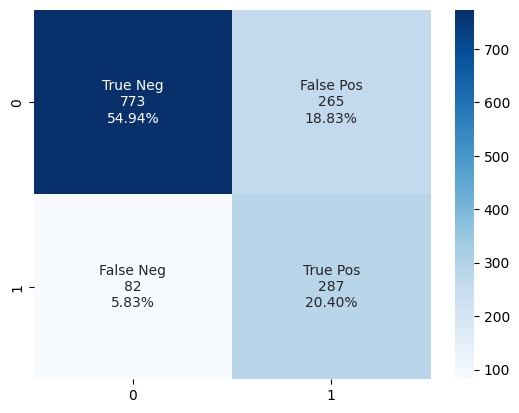

In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf')
# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)
model_evaluation(lr_model,X_test,y_test)

# Results Table

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a list of models to evaluate
models = [
    ('XG Boost', XGBmodel),
    ('Logistic Regression', lr_model),
    ('Decision Tree', dtree),
    ('Decision Tree HT', best_dt),
    ('Random Forest', rf),
    ('KNN', KNNmodel),
    ('SVM', svm_classifier)
]

# Initialize an empty DataFrame
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Loop through each model
for model_name, model in models:

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the results to the DataFrame
    results_df = results_df.append({'Model': model_name, 'Accuracy': accuracy,
                                    'Precision': precision, 'Recall': recall, 'F1 Score': f1},
                                    ignore_index=True)


# Define a custom function to highlight the maximum value in a Series
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: red' if v else '' for v in is_max]

# Apply the highlight_max function to the DataFrame
results_df = results_df.style.apply(highlight_max, axis=0, subset=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display the DataFrame
results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,XG Boost,0.728500,0.489396,0.813008,0.610998
1,Logistic Regression,0.753376,0.519928,0.777778,0.623236
2,Decision Tree,0.719261,0.471239,0.577236,0.518879
3,Decision Tree HT,0.732765,0.492929,0.661247,0.564815
4,Random Forest,0.779673,0.567506,0.672087,0.615385
5,KNN,0.738451,0.501104,0.615176,0.552311
6,SVM,0.752665,0.520548,0.720867,0.604545


In [ ]:
# import joblib

In [ ]:
# joblib.dump(scaler,'logr_scaler.pkl')

In [ ]:
# import pickle

In [ ]:
# pkl_filename = "XGBmodel.pkl"
# with open(pkl_filename, 'wb') as file1:
#     pickle.dump(XGBmodel, file1)

In [ ]:
# pkl_filename = "LOGRmodel.pkl"
# with open(pkl_filename, 'wb') as file1:
#     pickle.dump(lr_model, file1)

In [ ]:
# gender  :  [0 1]  =  ['Female' 'Male']
# Partner  :  [1 0]  =  ['Yes' 'No']
# Dependents  :  [0 1]  =  ['No' 'Yes']
# PhoneService  :  [0 1]  =  ['No' 'Yes']
# MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
# InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
# OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
# OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
# DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
# TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
# StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
# StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
# Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
# PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
# PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
#  'Credit card (automatic)']
# Churn  :  [0 1]  =  ['No' 'Yes']

In [ ]:
# def model(classifier,x_train,y_train,x_test,y_test):

#     classifier.fit(x_train,y_train)
#     prediction = classifier.predict(x_test)
#     cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
#     print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
#     print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
#     roc_curve(x_test,y_test)
#     plt.title('ROC_AUC_Plot')
#     plt.show()
